# Statistics I & II

### Part 1. _Analyzing Stop and Frisk Data_

An analysis by the NYCLU revealed that innocent New Yorkers have been subjected to police stops and street interrogations more than 5 million times since 2002, and that black and Latino communities continue to be the overwhelming target of these tactics. Nearly nine out of 10 stopped-and-frisked New Yorkers have been completely innocent. <br>

The defenders of Stop & Frisk have said that the stops have been random and as such they've been able to reduce the crime rates in the city. However, you feel that you the arrests have been leveled in an unfair manner and more so against black people in the city. <br>

As such you set out to investigate this and look at the stop and frisk data from 2003 - 2017. The data is provided as excel files in the NYPD website below:

<img src = '.\stopfrisk\stop_frisk.png'>

You realize that some of the files are not like the others but you have enough information from the files to make your analysis work. You are certainely interested in establishing whether, for the stops that didn't lead to an arrest (where no offense was found), was the choice to stop the subject random or not. In this analysis, you will  have to consider the population of NYC as found in the census website below.

<img src = '.\stopfrisk\population.png'>

### Your task

Your task is to come up with the statistic and the model needed to find out whether the stop and frisk program could actually be biased in its treatment of NYC's black population. Could it be biased? Or it is as random as the NYPD claims?

### Please note

Please take the time to study the files. The codebook to the files is provided. 
<br>
Making the time upfront to understand the data and the task you are supposed to do is useful. It iwll make the task of putting together the files to come up with the conviction rates plus coming up with the statistic and the simulations very straightforward. <br>
The goal of the question is to get you using all the skills you have learned in class to do the kind of work you'd be doing outside of a class environment.

In [15]:
import pandas as pd
import numpy as np

In [218]:
# Merge 2003-2016 CSVs
import pandas as pd
filenames= ['2003.csv', '2004.csv', '2005.csv', '2006.csv', '2007.csv', '2008.csv',
            '2009.csv','2010.csv','2011.csv','2012.csv','2013.csv','2014.csv','2015.csv','2016.csv']
dfs = []

for filename in filenames:
    dfs.append(pd.read_csv(filename, dtype='unicode', encoding ='latin1'))
dfs = pd.concat(dfs,sort=False)

In [220]:
#keep only cols of interest
df1 = dfs[['year', 'arstmade', 'race']]

In [294]:
#Read 2017 CSV- I chose to read and clean this dataframe separately, as the data is organized 
#differently from previous years
df17 = pd.read_csv('2017.csv')
df17 = df17[['year', 'arstmade', 'race']]

In [295]:
#recode 2017 dataframe to match 2003-2016
df17['race'] = df17['race'].replace(['WHITE'], 'W')
df17['race'] = df17['race'].replace(['BLACK HISPANIC'], 'P')
df17['race'] = df17['race'].replace(['BLACK'], 'B')
df17['race'] = df17['race'].replace(['WHITE HISPANIC'], 'Q')
df17['race'] = df17['race'].replace(['ASIAN/PAC.ISL'], 'A')
df17['race'] = df17['race'].replace(['AMER IND'], 'I')
df17['race'] = df17['race'].replace(['MALE'], 'X')

In [297]:
#combine 2003-2016 dataframe with 2017 dataframe
dfr = []
dfr.append(df1)
dfr.append(df17)
dfr
dfr = pd.concat(dfr,sort=False)

In [312]:
#drop blank, null, unknown race and stops where an arrest was made 
dfr['race'] = dfr['race'].replace([' '], '(null)')
dfr['arstmade'] = dfr['arstmade'].replace([' '], '(null)')
dfr = dfr[(dfr['race'] != '(null)') & (dfr['arstmade']!= '(null)') & (dfr['race'] != 'X') & (dfr['race'] != 'U')]
#drop if arrest was made 
dfr = dfr[(dfr['arstmade']== 'Y')]

In [363]:
#here we can see that black (black + hispanic black) stops made up 58% of all stops that did not lead to an arrest
df_race=dfr.groupby(['race','arstmade']).arstmade.agg('count')
df_race=df_race.groupby('race').agg(['sum'])
df_race['perc']= df_race['sum']/df_race['sum'].sum()
df_race

,sum,perc
race,,
A,9850,0.031904
B,157921,0.511507
I,969,0.003139
P,21426,0.069399
Q,77806,0.252014
W,32334,0.104730
Z,8431,0.027308


In [326]:
# Based on the black population 25.5% of NYC's total, we would expect ~25% of stops that did not lead to an 
#arrest to be of blacks if the stops were random. (Source: NYC Planning Data on 2010 Decennial Census)
panel = [0.255, 0.745]
sample_panel = np.random.multinomial(100, panel)
sample_panel

array([25, 75])

In [328]:
# Run a simulation model based on the statistic 
simulations = ()
num_simulations = 10000

for i in np.arange(num_simulations):
    sample_panel = np.random.multinomial(100, panel)[0]
    simulations = np.append(simulations, sample_panel)

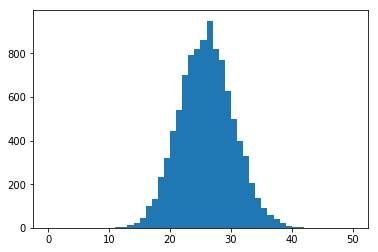

In [329]:
#Plot simulation 
plt.hist(simulations, bins = np.arange(0, 51, 1) );

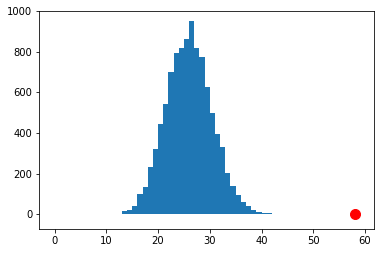

In [364]:
#58% of all stops that did not lead to an arrest were of blacks. 58% falls far outside our simulated distribution,
#and is much greater than we would expect if the stops were done at random. It seems unlikely that the stops that
#did not lead to arrests were done randomly by race.
plt.hist(simulations, bins = np.arange(0, 51, 1) )
plt.scatter(58, 0, color='red', s=100);

### Part 2: *Earnings, gender & height*

### Background on the data
The National Longitudinal Surveys (NLS) are a set of surveys designed to gather information at multiple points in time on the labor market activities and other significant life events of several groups of men and women. For more than 4 decades, NLS data have served as an important tool for economists, sociologists, and other researchers. <br>

The NLS has 7 major cohorts that it has studied ( we are interested in the ones highlighted ): 
- **National Longitudinal Survey of Youth 1997 (NLSY97)**
- **National Longitudinal Survey of Youth 1979 (NLSY79)**
- NLSY79 Child and Young Adult
- Older Men
- Mature Women
- Young Men
- Young Women

The NLS has two major National Longitudinal Surveys of Youth (NLSY). One is from 1979 and the other is from 1997. Both collect data on employment, income, and personal characteristics from cohorts of people who were young at the time the surveys started. More specifically, 14 to 22 years old for NLSY79 and 12 to 17 years old for NLSY97. <br>

The latest datasets are from 2014 for NLSY79 and 2015 for NLSY97. Meaning that respondents would be in the 50s and their 30s, respectively.<br>

### Your task

The current task at hand is to look at the distribution of height and decide on who is tall / short. <br><br>

Then based on this, you want to see how the income distribution is according to a person being tall / short. With the pattern that you find, and that which points to a difference, you would like to test a set of hypotheses. <br><br>

One ( the null) is that the income distribution is random while the alternative is that indeed, heights and income have a relationship.<br><br>

Because both datasets are at their peak earning, please use both data sets (NLSY97 and NLSY79). Your analyses should be separate. Not all the data will be complete, so please clean your data accordingly and also make conclusions based on what you see.


### Where to get the gender, height, and earnings data

You can get the sex, height and earnings data from the NLS website. 

https://www.nlsinfo.org/investigator/pages/login.jsp

Use the search method to get you the right data that you want. Do this seprately for both the NYLS79 and NYLS97 data.


**As an example, to get the gender of NLSY97 from the site you would go to variable search and look for gender in Variable Search under the search tab. You would then click on add to add the data. In addition, you would then look for height (both feet and inches) in 2015 and earnings in 2014 or 2015 (or whichever you find as the latest).**

<img src = './earnings/gender.png'>

After that you can review the variables that you have chosen under the review tab

<img src = './earnings/review.png' width="75%" height="75%">

And then make sure to save your work as a CSV.
<img src = './earnings/download.png' width="75%" height="75%">

### Imortant Notice: Existence of similar work

There exists similar work on this studies on the internet. Please, if you need to, use that work more as a guide but not as the answer, as the computation and expected product from this is different from what you will see out there. Pay attention to the nuances to not be penalized for plagiarism.

In [125]:
import pandas as pd
df79 = pd.read_csv('NLSY1979_heightinc.csv')
df97 = pd.read_csv('NLSY1997_heightinc.csv')

In [126]:
#data cleaning: remove N/A values & add total height variable 
df79['height'] = df79['ft']*12 + df79['in']
df79 = df79[(df79['ft'] >=0) & (df79['income']>=0)]
df97['height'] = df97['ft']*12 + df97['in']
df97 = df97[(df97['ft'] >=0) & (df97['income']>=0)]

In [76]:
#examine height distributions 
df79['height'].describe()

count    6504.000000
mean       67.084256
std         4.243181
min        31.000000
25%        64.000000
50%        67.000000
75%        70.000000
max       145.000000
Name: height, dtype: float64

In [77]:
df97['height'].describe()

count    4699.000000
mean       67.672058
std         4.262553
min        13.000000
25%        64.000000
50%        68.000000
75%        71.000000
max        88.000000
Name: height, dtype: float64

In [72]:
import matplotlib.pyplot as plt

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+01, 1.900e+01,
        2.440e+02, 6.800e+02, 1.528e+03, 1.099e+03, 9.410e+02, 1.342e+03,
        4.470e+02, 1.380e+02, 4.400e+01, 5.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 31.  ,  33.28,  35.56,  37.84,  40.12,  42.4 ,  44.68,  46.96,
         49.24,  51.52,  53.8 ,  56.08,  58.36,  60.64,  62.92,  65.2 ,
         67.48,  69.76,  72.04,  74.32,  76.6 ,  78.88,  81.16,  83.44,
         85.72,  88.  ,  90.28,  92.56,  94.84,  97.12,  99.4 , 101.68,
        103.96, 106.24, 108.52, 110.8 , 113.08, 115.36, 117.64, 119.92,
        122.2 , 

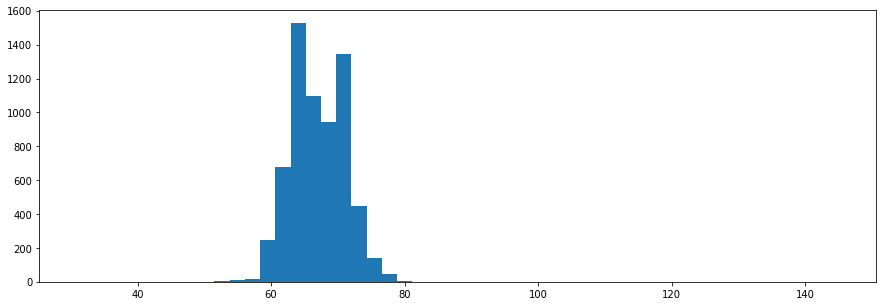

In [73]:
#plot height distributions for further examination 
plt.figure(figsize=(15, 5))
plt.hist(df79['height'],bins=50)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   2.,   0.,   0.,   6.,  49.,  94., 396.,
        291., 669., 386., 790., 368., 685., 348., 393., 105.,  90.,  14.,
          5.,   1.,   4.,   0.,   0.,   1.]),
 array([13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. , 26.5, 28. ,
        29.5, 31. , 32.5, 34. , 35.5, 37. , 38.5, 40. , 41.5, 43. , 44.5,
        46. , 47.5, 49. , 50.5, 52. , 53.5, 55. , 56.5, 58. , 59.5, 61. ,
        62.5, 64. , 65.5, 67. , 68.5, 70. , 71.5, 73. , 74.5, 76. , 77.5,
        79. , 80.5, 82. , 83.5, 85. , 86.5, 88. ]),
 <a list of 50 Patch objects>)

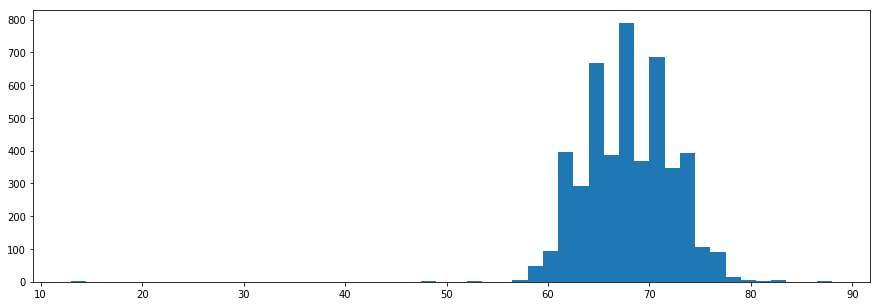

In [71]:
plt.figure(figsize=(15, 5))
plt.hist(df97['height'],bins=50)

In [130]:
#used median as a cut-point to determine who is tall or short 
import numpy as np
df79['tall'] = np.where(df79['height']<67, 'short', 'tall')
df97['tall'] = np.where(df97['height']<68, 'short', 'tall')

In [133]:
#we can see there's a pretty sizable difference between median income for tall and short R's in both datasets
df79.groupby('tall').mean()

,gender,ft,in,income,height
tall,,,,,
short,1.883645,4.964930,3.873812,29328.067847,63.452966
tall,1.199826,5.308717,6.588184,53998.601216,70.292789


In [134]:
df97.groupby('tall').mean()

,gender,ft,in,income,height
tall,,,,,
short,1.825864,4.974819,4.48997,38455.454972,64.187793
tall,1.139643,5.406621,6.25764,49915.571307,71.137097


In [135]:
#3051 "short" and 3453 "tall" in 1979 dataset
df79.groupby('tall').count()

,gender,ft,in,income,height
tall,,,,,
short,3051,3051,3051,3051,3051
tall,3453,3453,3453,3453,3453


In [143]:
average_scores79 = ()
simulations = 1000
for i in np.arange(simulations):
    average_scores79 = np.append(average_scores79, df79['income'].sample(3453, replace = False).mean())

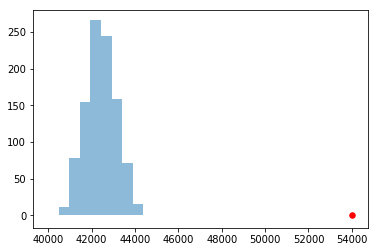

In [144]:
plt.hist(average_scores79, alpha = 0.5)
observed_inc = 53998.601216
plt.scatter(observed_inc, 0, color='red', s=30);

In [148]:
np.count_nonzero(average_scores79 >= observed_inc)/simulations

0.0

In [ ]:
#About 0% of the simulated random sample averages were $53,998 and above. 
#This provides evidence to reject the null hypothesis that the income distribution is random. 

In [136]:
#1997 data
#2343 "short" and 2356 "tall"
df97.groupby('tall').count()

,gender,ft,in,income,height
tall,,,,,
short,2343,2343,2343,2343,2343
tall,2356,2356,2356,2356,2356


In [150]:
average_scores97 = ()
simulations = 1000
for i in np.arange(simulations):
    average_scores97 = np.append(average_scores97, df97['income'].sample(2356, replace = False).mean())

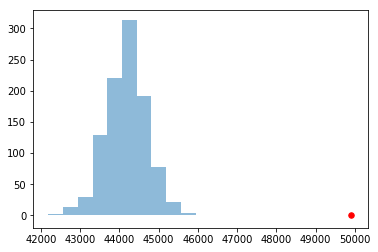

In [151]:
plt.hist(average_scores97, alpha = 0.5)
observed_inc1 = 49915.571307
plt.scatter(observed_inc1, 0, color='red', s=30);

In [152]:
np.count_nonzero(average_scores97 >= observed_inc1)/simulations

0.0

In [ ]:
#About 0% of the simulated random sample averages were $49,915 and above. 
#This provides evidence to reject the null hypothesis that the income distribution is random. 

### Part 3: The Math of Gender, Sex & Earnings

In [ ]:
#1. Please list the quartiles of the earnings for both NLYS79 and NLYS97 data sets

In [112]:
#1979 income quartiles: 1st: $0, 2nd: $0, 3rd: $28000, 4th: $57223
df79.income.describe()

count      6504.000000
mean      42425.754151
std       60776.295593
min           0.000000
25%           0.000000
50%       28000.000000
75%       57223.000000
max      370314.000000
Name: income, dtype: float64

In [113]:
#1997 income quartiles: 1st: $0, 2nd: $22000, 3rd: $37000, 4th: $56000
df97.income.describe()

count      4699.000000
mean      44201.365610
std       35269.995924
min           0.000000
25%       22000.000000
50%       37000.000000
75%       56000.000000
max      212641.000000
Name: income, dtype: float64

In [ ]:
#2. What is the correlation between height and earnings for each of the data sets? 
#What is it when adjusted for gender - what is the r value?

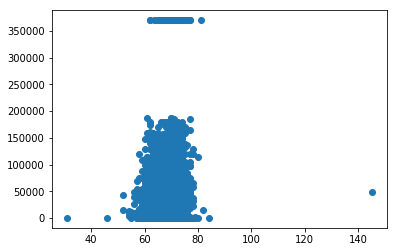

In [159]:
#1979 data plot
plt.scatter(df79['height'], df79['income']);

In [153]:
def standardize(numbers):
    "Convert any array of numbers to standard units."
    return (numbers - np.mean(numbers))/np.std(numbers) 

In [155]:
df79['heightstd'] = standardize(df79['height'])
df79['incstd'] = standardize(df79['income'])

In [157]:
df79['product'] = df79['heightstd']*df79['incstd']

In [158]:
# r between height and income is 0.22 for the 1979 data
df79['product'].mean()

0.22071901194413784

In [196]:
#r between height and income is 0.17 for females in the 1979 data 
df79.loc[df79['gender'] == 2].mean()

gender           2.000000
ft               4.976078
in               4.547253
income       29485.857058
height          64.260189
tall             0.000000
heightstd       -0.665605
incstd          -0.212927
product          0.168202
dtype: float64

In [195]:
#r between height and income is 0.27 for males in the 1979 data 
df79.loc[df79['gender'] == 1].mean()

gender           1.000000
ft               5.333547
in               6.148493
income       56477.868185
height          70.151058
tall             0.000000
heightstd        0.722816
incstd           0.231228
product          0.277750
dtype: float64

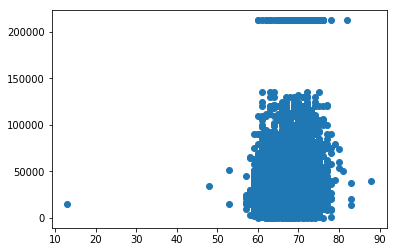

In [160]:
#1997 data plot
plt.scatter(df97['height'], df97['income']);

In [161]:
df97['heightstd'] = standardize(df97['height'])
df97['incstd'] = standardize(df97['income'])

In [163]:
df97['product'] = df97['heightstd']*df97['incstd']

In [165]:
# r between height and income is 0.17 for the 1997 data
df97['product'].mean()

0.1748546620429641

In [197]:
#r between height and income is 0.19 for males in the 1997 data 
df97.loc[df97['gender'] == 1].mean()

gender           1.000000
ft               5.381930
in               5.931828
income       50653.441889
height          70.514990
tall             0.000000
heightstd        0.667026
incstd           0.182953
product          0.186404
dtype: float64

In [198]:
#r between height and income is 0.16 for females in the 1997 data
df97.loc[df97['gender'] == 2].mean()

gender           2.000000
ft               4.986307
in               4.778710
income       37261.963781
height          64.614399
tall             0.000000
heightstd       -0.717407
incstd          -0.196772
product          0.162433
dtype: float64

In [ ]:
#3. Please run a regression analysis on the data sets and comment on the effects of height and earnings.

In [167]:
from scipy.stats import linregress
linregress(df79['height'], df79['income'])

LinregressResult(slope=3161.4214079404733, intercept=-169655.84840512846, rvalue=0.22071901194413795, pvalue=1.3658138037682347e-72, stderr=173.25032527222436)

In [ ]:
#Based on our regression output for 1979, we can expect an average $3161 increase in annual income per person 
#for every inch increase in height. 

In [168]:
linregress(df97['height'], df97['income'])

LinregressResult(slope=1446.8144625259363, intercept=-53707.54644670888, rvalue=0.17485466204296496, pvalue=1.4124491136635892e-33, stderr=118.87284108988591)

In [ ]:
#Based on our regression output for 1997, we can expect an average $1447 increase in annual income per person 
#for every inch increase in height. 